In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# batsman class

In [2]:
class batsman:
    data=pd.read_csv('Batsman_Data.csv',sep=",")
    df=pd.DataFrame(data)
    

# Bolwer class

In [3]:
class bowler:
    data=pd.read_csv('Bowler_data.csv',sep=",")
    df=pd.DataFrame(data) 

# ground class

In [4]:
class grounds:
    data=pd.read_csv('Ground_Averages.csv',sep=",")
    df=pd.DataFrame(data)

# result class

In [5]:
class result:
    data=pd.read_csv('ODI_Match_Results.csv',sep=",")
    df=pd.DataFrame(data)

# matches class 

In [6]:
class matches:
    data=pd.read_csv('ODI_Match_Totals.csv',sep=",")
    df=pd.DataFrame(data)

# players class 

In [7]:
class players:
    data=pd.read_csv('WC_players.csv',sep=",")
    df=pd.DataFrame(data)

# objects

In [8]:
bat=batsman()
ball=bowler()
ground = grounds()
result=result()
match=matches()
player=players()

# 1. runs wkts 4s and 6s analysis

In [9]:
# Total Runs and Wickets

bat.t_runs=sum(bat.df['Runs'])
ball.t_wkts=sum(ball.df['Wkts'])

# Total overs and median overs

ball.t_overs=sum(ball.df['Overs'])
ball.t_mdns=sum(ball.df['Mdns'])

# Total no of sixs and fours 

bat.t_6s=sum(bat.df['6s'])
bat.t_4s=sum(bat.df['4s'])

In [10]:
print("Total runs score by all batsmans :: ",bat.t_runs," Runs")
print("Total wickets by all blowers :: ",ball.t_wkts," Wickets")
print("Total no Overs :: ",round(ball.t_overs,5)," Overs")
print("Total no medain Overs :: ",round(ball.t_mdns,5),"  median Overs")
print("Total no of sixs :: ",bat.t_6s," sixs..")
print("Total no of fours :: ",bat.t_4s," fours..")

Total runs score by all batsmans ::  256030  Runs
Total wickets by all blowers ::  6762  Wickets
Total no Overs ::  41987.7  Overs
Total no medain Overs ::  1799   median Overs
Total no of sixs ::  4814  sixs..
Total no of fours ::  23197  fours..


# 2.matchs played in each team
## From 3- jan -2013 TO 19- May-2019 

<AxesSubplot:xlabel='count', ylabel='Country'>

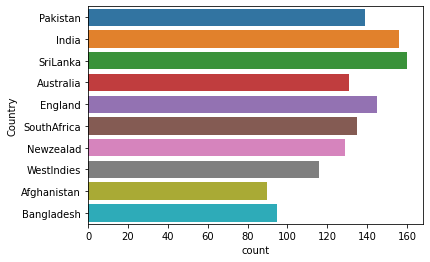

In [11]:
sns.countplot(y=(match.df.Country))

In [12]:
match.m_matches={1:"Sri Lanka",2:"India",3:"England"}
print("most matches are played by :: ",match.m_matches[1])
print("2nd :: ",match.m_matches[2])
print("3rd :: ",match.m_matches[3])

most matches are played by ::  Sri Lanka
2nd ::  India
3rd ::  England


# 3. highest scoring ground 

Text(0.5, 1.0, 'highest scoring ground')

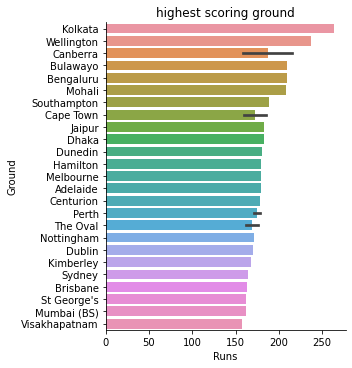

In [13]:
sns.catplot(x="Runs",y="Ground",data=bat.df.nlargest(30,'Runs'),kind="bar")
plt.title("highest scoring ground")

In [14]:
print("from graph of highest scoring ground we have  ranking as :: ")
ground.h_scoring={1:"Kolkata",2:"wellington",3:"Canberra"}
print("1st ::",ground.h_scoring[1])
print("2nd ::",ground.h_scoring[2])
print("3rd ::",ground.h_scoring[3])

from graph of highest scoring ground we have  ranking as :: 
1st :: Kolkata
2nd :: wellington
3rd :: Canberra


# 4. heighest wicket taking ground 

Text(0.5, 1.0, 'highest wickets taking ground')

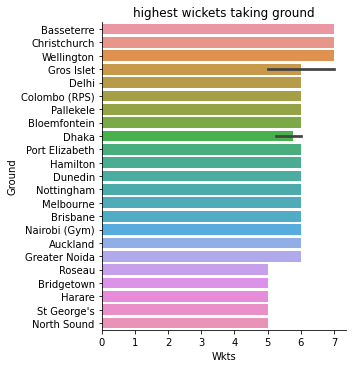

In [15]:
sns.catplot(x="Wkts",y="Ground",data=ball.df.nlargest(30,'Wkts'),kind="bar")
plt.title("highest wickets taking ground")

In [16]:
print("from graph of highest wicket taking ground we have  ranking as :: ")
ground.h_wicket_tacking={1:"Basseterre",2:"christichurch",3:"wellington"}
print("1st ::",ground.h_wicket_tacking[1])
print("2nd ::",ground.h_wicket_tacking[2])
print("3rd ::",ground.h_wicket_tacking[3])

from graph of highest wicket taking ground we have  ranking as :: 
1st :: Basseterre
2nd :: christichurch
3rd :: wellington


# 5. batsman to play most matches

In [17]:
new = bat.df['Batsman'].value_counts()[:100]
player.h_match_played=pd.DataFrame(new)
print(player.h_match_played[:15])

                   Batsman
MS Dhoni               341
Chris Gayle            289
Shoaib Malik           284
Virat Kohli            227
Eoin Morgan            222
Ross Taylor            218
Lasith Malinga         218
Mohammad Hafeez        210
Mashrafe Mortaza       209
Rohit Sharma           206
Mushfiqur Rahim        205
Angelo Mathews         203
Shakib Al Hasan        198
JP Duminy              194
Tamim Iqbal            193


# 6. Batsmans induvidual data

In [18]:
def ind_bat_data(name,country):
    induvial=batsman()
    n=name
    coun=country
    induvial.bd_opposition = induvial.df.query('Opposition ==@coun and Batsman==@n')
    if(induvial.bd_opposition.shape[0]==0):
        print("no such player found sorry!! :( ")
    else:
        print("total runs scored by ",n," agaist",coun," is ::",sum(induvial.bd_opposition.Runs),"\n")
        induvial.no_matches = induvial.bd_opposition.shape[0]
        print("no of matches played by ",n," agaist ",coun," is  : ",induvial.no_matches,"\n")
        induvial.avg_sr=sum(induvial.bd_opposition.SR)/induvial.no_matches 
        print("avg strike rate of ",n," agaist ",coun," is  : ",round(induvial.avg_sr,2),"\n")
        print("total fours scored by ",n," agaist",coun," is ::",sum(induvial.bd_opposition['4s']),"\n")
        print("total sixes scored by ",n," agaist",coun," is ::",sum(induvial.bd_opposition['6s']),"\n")
        print("total ball faced by ",n," agaist",coun," is ::",sum(induvial.bd_opposition['BF']),"\n")
        induvial.avg=sum(induvial.bd_opposition.Runs)/induvial.no_matches
        print("avg of ",n," agaist ",coun," is  : ",round(induvial.avg,2),"\n")
        return induvial.bd_opposition

### record of MS Dhoni v England

In [19]:
ms=ind_bat_data("MS Dhoni ","v England")

total runs scored by  MS Dhoni   agaist v England  is :: 1504 

no of matches played by  MS Dhoni   agaist  v England  is  :  47 

avg strike rate of  MS Dhoni   agaist  v England  is  :  83.85 

total fours scored by  MS Dhoni   agaist v England  is :: 125 

total sixes scored by  MS Dhoni   agaist v England  is :: 33 

total ball faced by  MS Dhoni   agaist v England  is :: 1727 

avg of  MS Dhoni   agaist  v England  is  :  32.0 



### runs vs strike rate graph of MSD 

<AxesSubplot:ylabel='Runs'>

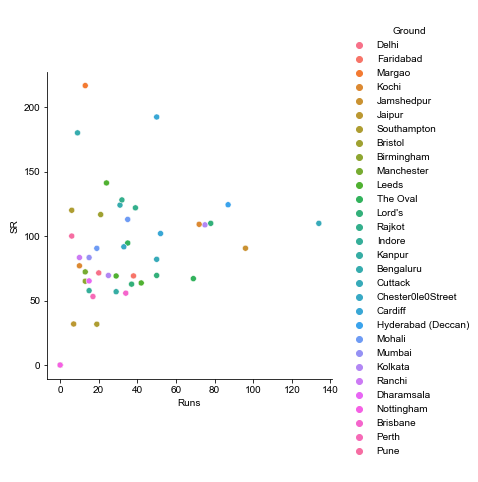

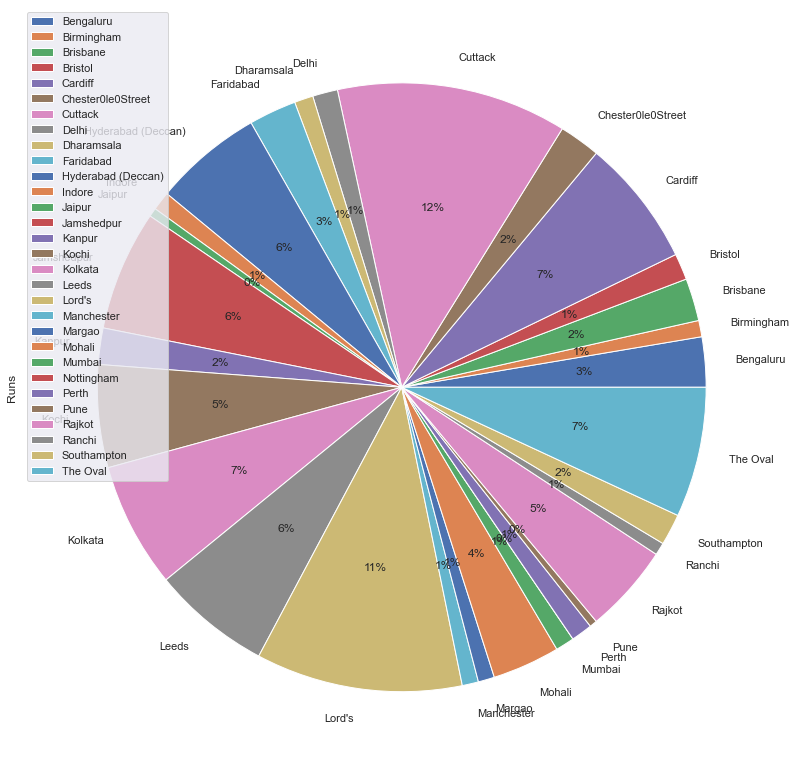

In [20]:
sns.relplot(x=ms['Runs'],y=ms['SR'],hue=ms['Ground'])

sns.set(rc={'figure.figsize':(14,14)})
ms.groupby(['Ground']).sum().plot(kind='pie',y='Runs',autopct='%1.0f%%')

### record of Virat Kohli  v Australia

In [21]:
vira=ind_bat_data("Virat Kohli ","v Australia")
vira

total runs scored by  Virat Kohli   agaist v Australia  is :: 1645 

no of matches played by  Virat Kohli   agaist  v Australia  is  :  36 

avg strike rate of  Virat Kohli   agaist  v Australia  is  :  76.63 

total fours scored by  Virat Kohli   agaist v Australia  is :: 153 

total sixes scored by  Virat Kohli   agaist v Australia  is :: 17 

total ball faced by  Virat Kohli   agaist v Australia  is :: 1718 

avg of  Virat Kohli   agaist  v Australia  is  :  45.69 



,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Unnamed: 13,Unnamed: 14
6683,6684,T0,0,0,0.00,0,0,v Australia,Centurion,28-Sep-09,ODI # 2901,Virat Kohli,253802,NaN,NaN
6685,6686,30,30,41,73.17,3,0,v Australia,Vadodara,25-Oct-09,ODI # 2913,Virat Kohli,253802,NaN,NaN
6686,6687,10,10,16,62.50,1,0,v Australia,Mohali,2-Nov-09,ODI # 2919,Virat Kohli,253802,NaN,NaN
6710,6711,118,118,121,97.52,11,1,v Australia,Visakhapatnam,20-Oct-10,ODI # 3060,Virat Kohli,253802,NaN,NaN
6727,6728,24,24,33,72.72,1,0,v Australia,Ahmedabad,24-Mar-11,ODI # 3143,Virat Kohli,253802,NaN,NaN
6750,6751,31,31,34,91.17,3,0,v Australia,Melbourne,5-Feb-12,ODI # 3231,Virat Kohli,253802,NaN,NaN
6752,6753,18,18,28,64.28,1,0,v Australia,Adelaide,12-Feb-12,ODI # 3237,Virat Kohli,253802,NaN,NaN
6754,6755,12,12,25,48.00,0,0,v Australia,Brisbane,19-Feb-12,ODI # 3244,Virat Kohli,253802,NaN,NaN
6756,6757,21,21,27,77.77,2,0,v Australia,Sydney,26-Feb-12,ODI # 3250,Virat Kohli,253802,NaN,NaN
6789,6790,61,61,85,71.76,6,0,v Australia,Pune,13-Oct-13,ODI # 3419,Virat Kohli,253802,NaN,NaN


### runs vs strike rate graph of Run machine 

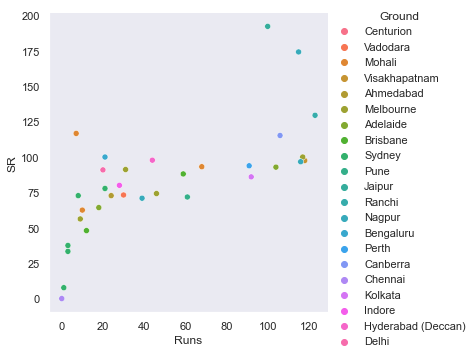

<AxesSubplot:ylabel='Runs'>

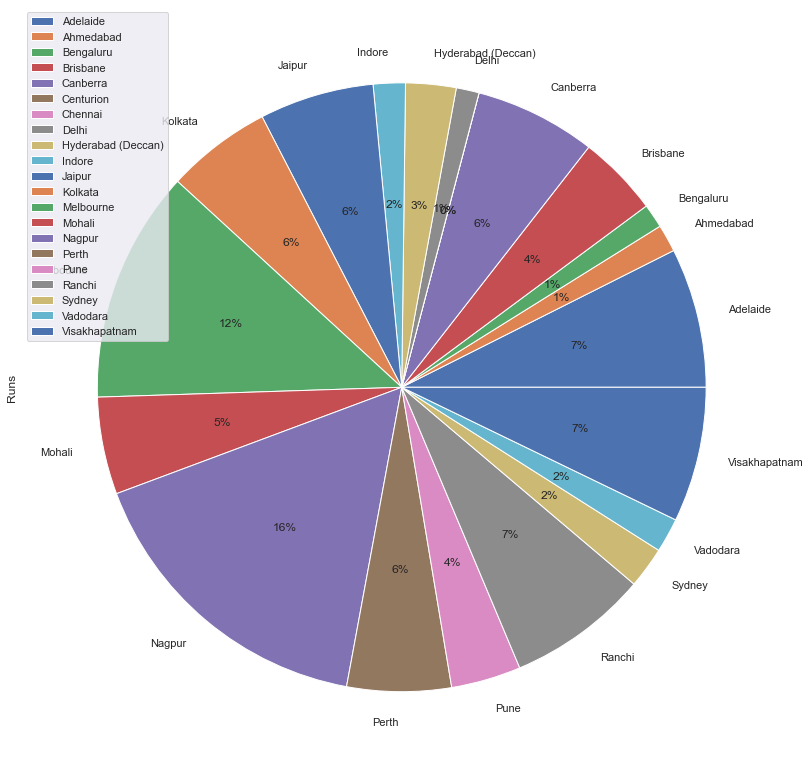

In [22]:
sns.relplot(x=vira['Runs'],y=vira['SR'],hue=vira['Ground'])
plt.grid()
plt.show()
sns.set(rc={'figure.figsize':(14,14)})
vira.groupby(['Ground']).sum().plot(kind='pie',y='Runs',autopct='%1.0f%%')

In [23]:
ind_bat_data("Virat Kohli","v Australia")
# mistake in name or country name will result this

no such player found sorry!! :( 


# 7 Bolwers induvidual data

In [24]:
def ind_ball_data(name,country):
    induvial=bowler()
    n=name
    coun=country
    induvial.bd_opposition = induvial.df.query('Opposition ==@coun and Bowler==@n')
    if(induvial.bd_opposition.shape[0]==0):
        print("no such player found sorry!! :( ")
    else:
        induvial.t_matches=induvial.bd_opposition.shape[0]
        print("total matches played by ",n," against ",coun," is :: ",induvial.t_matches)
        induvial.t_wkts=sum(induvial.bd_opposition['Wkts'])
        print("total wickets taken by ",n," against ",coun," is :: ",induvial.t_wkts)
        induvial.t_overs=sum(induvial.bd_opposition['Overs'])
        print("total overs by ",n," against ",coun," is :: ",induvial.t_overs)
        induvial.t_mdns=sum(induvial.bd_opposition['Mdns'])
        print("total maiden overs by ",n," against ",coun," is :: ",induvial.t_mdns)
        induvial.t_econ=sum(induvial.bd_opposition['Econ'])/induvial.t_matches
        print("economy of ",n," against ",coun," is :: ",round(induvial.t_econ,2))

        return induvial.bd_opposition
    

### induvial data of ravindra jadeja vs australia

In [25]:
ravi_data=ind_ball_data("Ravindra Jadeja","v Australia")
ravi_data

total matches played by  Ravindra Jadeja  against  v Australia  is ::  30
total wickets taken by  Ravindra Jadeja  against  v Australia  is ::  23
total overs by  Ravindra Jadeja  against  v Australia  is ::  255.7
total maiden overs by  Ravindra Jadeja  against  v Australia  is ::  3
economy of  Ravindra Jadeja  against  v Australia  is ::  5.22


,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5386,5387,9.0,0,39,1,4.33,39.00,54.0,v Australia,Vadodara,25-Oct-09,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0,35,3,5.38,11.66,13.0,v Australia,Nagpur,28-Oct-09,ODI # 2915,Ravindra Jadeja,234675
5388,5389,9.0,1,41,2,4.55,20.50,27.0,v Australia,Delhi,31-Oct-09,ODI # 2918,Ravindra Jadeja,234675
5389,5390,7.0,0,27,0,3.85,0.00,0.0,v Australia,Mohali,2-Nov-09,ODI # 2919,Ravindra Jadeja,234675
5390,5391,5.0,0,44,0,8.80,0.00,0.0,v Australia,Hyderabad (Deccan),5-Nov-09,ODI # 2923,Ravindra Jadeja,234675
5391,5392,10.0,1,36,0,3.60,0.00,0.0,v Australia,Guwahati,8-Nov-09,ODI # 2925,Ravindra Jadeja,234675
5431,5432,2.4,0,41,0,15.37,0.00,0.0,v Australia,Melbourne,5-Feb-12,ODI # 3231,Ravindra Jadeja,234675
5433,5434,10.0,0,50,0,5.00,0.00,0.0,v Australia,Adelaide,12-Feb-12,ODI # 3237,Ravindra Jadeja,234675
5435,5436,0.0,0,0,0,0.00,0.00,0.0,v Australia,Brisbane,19-Feb-12,ODI # 3244,Ravindra Jadeja,234675
5437,5438,10.0,0,51,1,5.10,51.00,60.0,v Australia,Sydney,26-Feb-12,ODI # 3250,Ravindra Jadeja,234675


<AxesSubplot:ylabel='Wkts'>

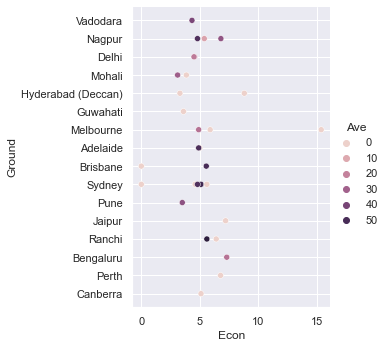

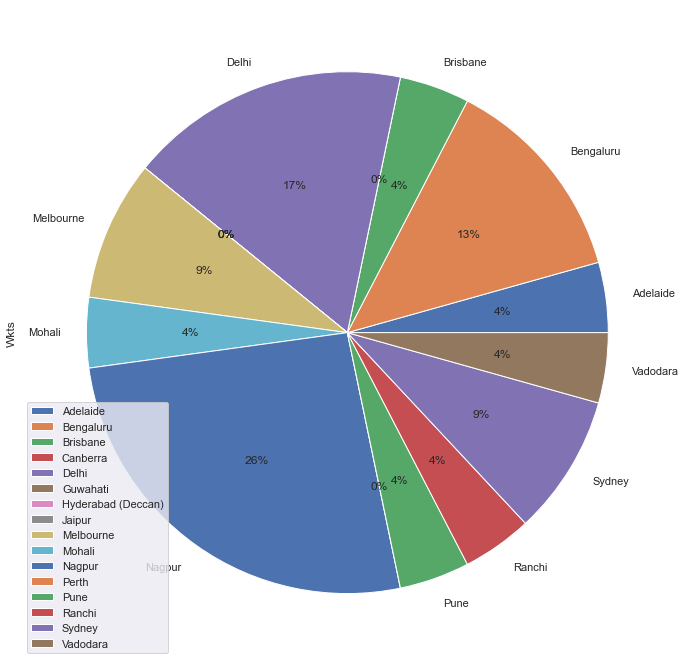

In [26]:
sns.relplot(x=ravi_data['Econ'],y=ravi_data.Ground,hue=ravi_data['Ave'])
sns.set(rc={'figure.figsize':(12,12)})
ravi_data.groupby(['Ground']).sum().plot(kind='pie',y='Wkts',autopct='%1.0f%%')

# 10. matches played on each ground

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


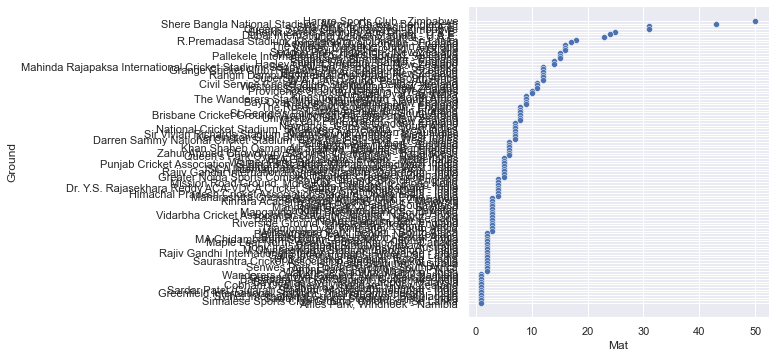

In [54]:
ground.df.Mat.max()
ground.df=ground.df.sort_values(by=['Mat'], ascending=False)
#ground.df=ground.df.reset_index() 
sns.relplot(x=ground.df.Mat,y=ground.df.Ground)

## top 10 Grounds

In [52]:
ground.df[['Ground','Mat']][:10]

,Ground,Mat
0,Harare Sports Club - Zimbabwe,50
1,"Shere Bangla National Stadium, Mirpur, Dhaka -...",43
2,Sharjah Cricket Stadium - U.A.E.,31
3,"Queens Sports Club, Bulawayo - Zimbabwe",31
4,"Sheikh Zayed Stadium, Abu Dhabi - U.A.E.",25
5,Dubai International Cricket Stadium - U.A.E.,24
6,"ICC Academy, Dubai - U.A.E.",23
7,"R.Premadasa Stadium, Khettarama, Colombo - Sri...",18
8,"Kennington Oval, London - England",17
9,"The Village, Malahide, Dublin - Ireland",16


# 11. win ratio as per ground

In [263]:
def win_ratio_win_toss(ground):
    prob=match.df[['Inns', 'Ground', 'Opposition', 'Result']]
    prob=prob.query('Ground == @ground')
    prob_b1 = prob.loc[prob['Inns']==1]  
    x=prob_b1['Result'].value_counts()
    label=["won","lost","tie"]
    sns.set(rc={'figure.figsize':(5,5)}) 
    plt.pie(x, autopct='%1.2f%%',labels=label)
    plt.title(f'Results after batting first in {ground} ground', size = 17, weight ="bold", pad=20)
    plt.legend()
    plt.show()
    
def win_ratio_loss_toss(ground):
    prob=match.df[['Inns', 'Ground', 'Opposition', 'Result']]
    prob=prob.query('Ground == @ground')
    prob_b1 = prob.loc[prob['Inns']==2]
    prob_b1
    x=prob_b1['Result'].value_counts()
    label=["won","lost","tie"]
    sns.set(rc={'figure.figsize':(5,5)})
    
    plt.pie(x, autopct='%1.2f%%',labels=label)
    plt.title(f'Results after bolwing first in {ground} ground', size = 17, weight ="bold", pad=20)
    plt.legend()
    plt.show()

In [264]:
def win_ratio(ground):
    win_ratio_loss_toss(ground)
    win_ratio_win_toss(ground)

## win ratio in Birmingham

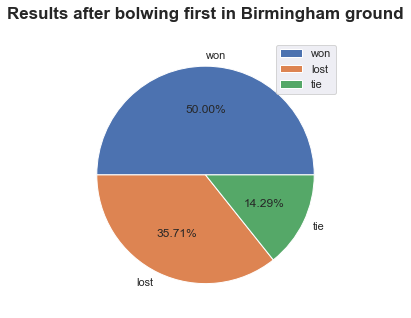

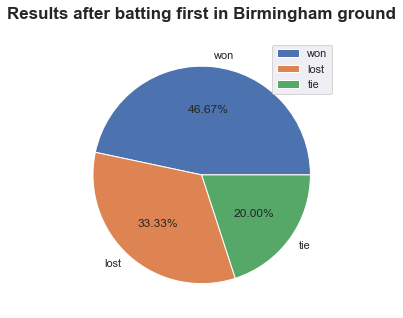

In [265]:
win_ratio("Birmingham")

## win ratio in Ranchi

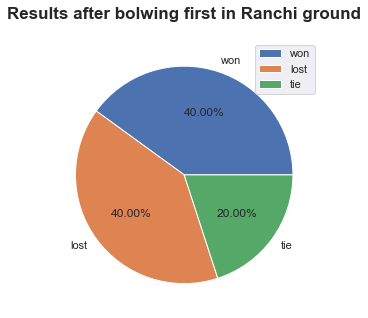

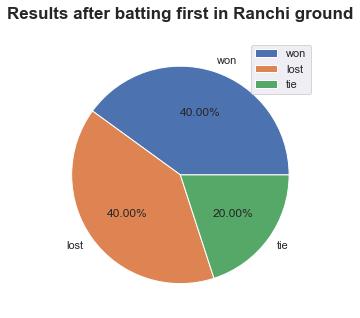

In [266]:
win_ratio("Ranchi")

#  12. ground target and result analysis

In [267]:
def g_t_r_analysis(ground):
    prob=match.df[['Target', 'Result', 'Ground']]
    prob = prob.dropna()
    #Grouping according to Matches played at Oval
    prob3g = prob.query('Ground == @ground')
    #Grouping according to winners at Oval
    prob3g = prob3g.loc[prob3g['Result']=='won']
    #Mean score of the wiining team
    mean_score = prob3g['Target'].mean()
    print(prob3g)
    print()
    print(f"The Average Score in {ground} is: ")
    print(round(prob['Target'].mean(),2))
    print(f"The Highest Score in {ground} is: ")
    print(prob3g['Target'].max())
    print(f"The Lowest Score in {ground} is: ")
    print(prob['Target'].min())

## analysis of pune

In [215]:
g_t_r_analysis("Pune")

     Target Result Ground
813   351.0    won   Pune
993   231.0    won   Pune

The Average Score in Pune is: 
253.44
The Highest Score in Pune is: 
351.0
The Lowest Score in Pune is: 
68.0


## analysis of Lord's

In [216]:
g_t_r_analysis("Lord's")

     Target Result  Ground
74    228.0    won  Lord's
735   252.0    won  Lord's
891   154.0    won  Lord's

The Average Score in Lord's is: 
253.44
The Highest Score in Lord's is: 
252.0
The Lowest Score in Lord's is: 
68.0


# 13. analysis of country and oppsosition

In [260]:
def coun_op_analysis(country,opposistion):
    prob5 = match.df.query('Country == @country')
    prob5 = prob5.query('Opposition == @opposistion')
    prob5.head()
    fig = figsize =(30, 20)
    label = ['Lost', 'Won', 'Abandoned']
    sns.set_palette("Paired", 9)
    plt.pie(prob5['Result'].value_counts(),  autopct='%1.2f%%', labels=label)
    plt.title(f'Result of Matches against {opposistion} for {country}', size = 17, weight ="bold", pad=20)
    

## Result of Matches against South Africa for India

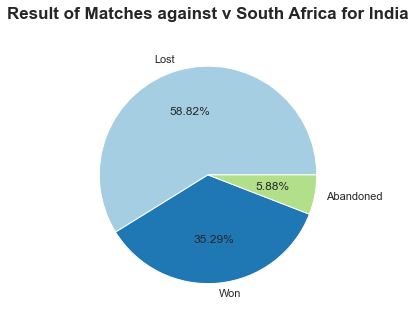

In [261]:
coun_op_analysis("India","v South Africa")

## Result of Matches against New Zealand for India

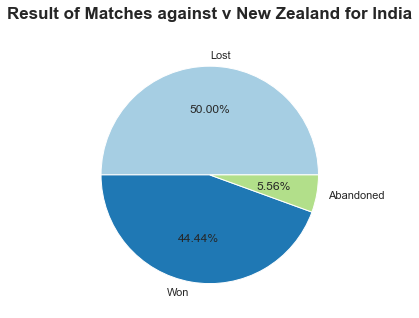

In [262]:
coun_op_analysis("India","v New Zealand")